In [1]:
import numpy as np
from matplotlib import pyplot as plt
plt.style.use('seaborn-white')

# 1 subplot2grid 创建形状大小不同的子图
- plt.subplot2grid（）

    参数1：是元组，确定画布被分割成几块
    
    参数2：是指定接下来要画的图在分割块的第几个坐标区域
    
    参数3，4：rowspan  colspan矩阵块的长宽
    
    
- plt.tight_layout()

    将这些子图合并起来，并且不要相互覆盖

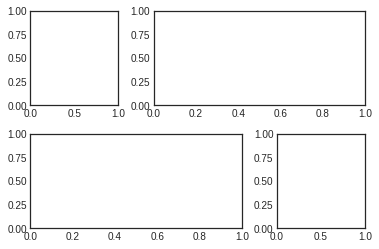

In [7]:
grid = plt.GridSpec(2, 3, wspace=0.4, hspace=0.3)

plt.subplot(grid[0, 0])
plt.subplot(grid[0, 1:])
plt.subplot(grid[1, :2])
plt.subplot(grid[1, 2])

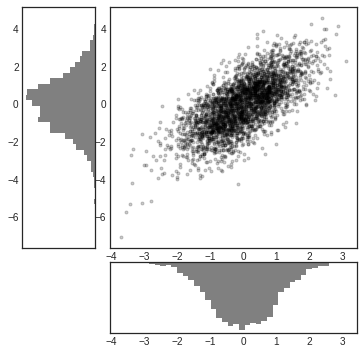

In [8]:
mean = [0, 0]
cov = [[1, 1], [1, 2]]
x, y = np.random.multivariate_normal(mean, cov, 3000).T

# Set up the axes with gridspec
fig = plt.figure(figsize=(6, 6))
grid = plt.GridSpec(4, 4, hspace=0.2, wspace=0.2)
main_ax = fig.add_subplot(grid[:-1, 1:])
y_hist = fig.add_subplot(grid[:-1, 0], xticklabels=[], sharey=main_ax)
x_hist = fig.add_subplot(grid[-1, 1:], yticklabels=[], sharex=main_ax)

# scatter points on the main axes
main_ax.plot(x, y, 'ok', markersize=3, alpha=0.2)

# histogram on the attached axes
x_hist.hist(x, 40, histtype='stepfilled',
            orientation='vertical', color='gray')
x_hist.invert_yaxis()

y_hist.hist(y, 40, histtype='stepfilled',
            orientation='horizontal', color='gray')
y_hist.invert_xaxis()

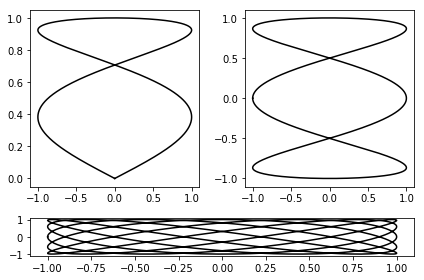

In [2]:
T = np.linspace(-np.pi, np.pi, 1024)
grid_size = (4, 2)

plt.subplot2grid(grid_size, (0, 0), rowspan = 3, colspan = 1)
plt.plot(np.sin(2 * T), np.cos(0.5 * T), c = 'k')

plt.subplot2grid(grid_size, (0, 1), rowspan = 3, colspan = 1)
plt.plot(np.cos(3 * T), np.sin(T), c = 'k')

plt.subplot2grid(grid_size, (3, 0), rowspan=1, colspan=3)
plt.plot(np.cos(5 * T), np.sin(7 * T), c= 'k')

plt.tight_layout()
plt.show()

### 1.1 对每个子图进行精细化设计

- axes.get_xaxis().set_visible(False) 
- axes.get_yaxis().set_visible(False)

1. 首先子图对象给了axes
2. 子图对象通过get_xaxis()获得x轴
3. 设置轴是否可见set_visibel()

/home/zhoutao/anaconda2/lib/python2.7/site-packages/ipykernel_launcher.py:11: DeprecationWarning: This function is deprecated. Please call randint(1, 20 + 1) instead
  # This is added back by InteractiveShellApp.init_path()


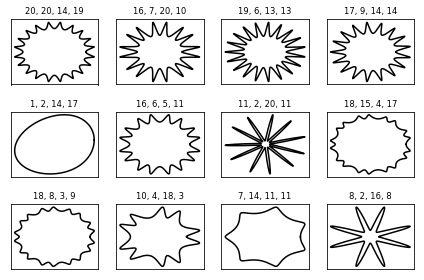

In [6]:
def get_radius(T, params):
    m, n_1, n_2, n_3 = params
    U = (m * T) / 4
    return (np.fabs(np.cos(U)) ** n_2 + np.fabs(np.sin(U)) ** n_3) **(-1. / n_1)

grid_size = (3, 4)
T = np.linspace(0, 2 * np.pi, 1024)

for i in range(grid_size[0]):    
     for j in range(grid_size[1]):
        params = np.random.random_integers(1, 20, size = 4)
        R = get_radius(T, params)
        axes = plt.subplot2grid(grid_size, (i, j), rowspan=1, colspan=1)
        axes.get_xaxis().set_visible(False)
        axes.get_yaxis().set_visible(False)
        plt.plot(R * np.cos(T), R * np.sin(T), c = 'k')
        plt.title('%d, %d, %d, %d' % tuple(params), fontsize = 'small')
plt.tight_layout()
plt.show()

# 2 plt.subplot()另一种创建子图的方式

fig, (ax0, ax1) = plt.subplots(ncols =2) 将画布fig 和图形对象分解开，ax0是左图对象，ax1是右图对象

也可以写成

fig = plt.figure()
ax0 = fig.add_subplots(2, 1, 1)
ax2 = fig.add_subplots(2,1,2)

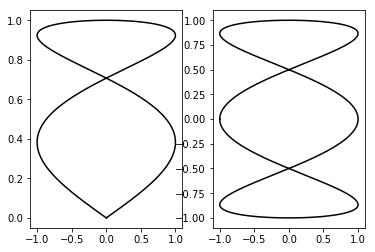

In [8]:
T = np.linspace(-np.pi, np.pi, 1024)
fig, (ax0, ax1) = plt.subplots(ncols =2)
ax0.plot(np.sin(2 * T), np.cos(0.5 * T), c = 'k')
ax1.plot(np.cos(3 * T), np.sin(T), c = 'k')
plt.show()

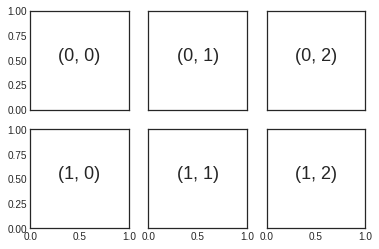

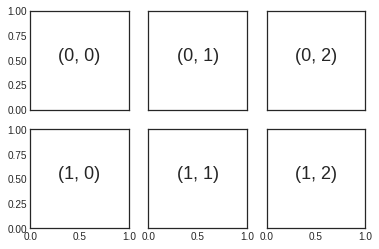

In [6]:
fig, ax = plt.subplots(2, 3, sharex='col', sharey='row')

for i in range(2):
    for j in range(3):
        ax[i, j].text(0.5, 0.5, str((i, j)),
                      fontsize=18, ha='center')
fig

在一个画布上分块成多个子画布

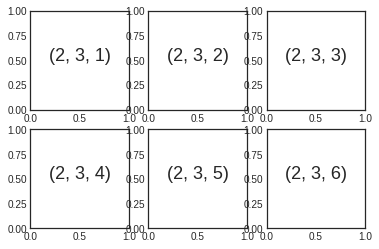

In [4]:
for i in range(1, 7):
    plt.subplot(2, 3, i)
    plt.text(0.5, 0.5, str((2, 3, i)),
             fontsize=18, ha='center')

调整图与图之间的间距

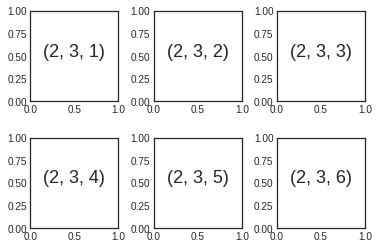

In [5]:
fig = plt.figure()
fig.subplots_adjust(hspace=0.4, wspace=0.4)
for i in range(1, 7):
    ax = fig.add_subplot(2, 3, i)
    ax.text(0.5, 0.5, str((2, 3, i)),
           fontsize=18, ha='center')

# 3 让两个轴的刻度尺度不相同

1. plt.axes()控制子图的坐标
2. set_aspect()将轴的刻度保持相同

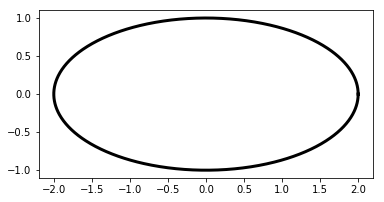

In [9]:
T = np.linspace(0, 2 * np.pi, 1024)
plt.plot(2. * np.cos(T), np.sin(T), c = 'k', lw = 3.)
plt.axes().set_aspect('equal')
plt.show()

plt.axes()里的参数依次是[left, bottom, width, height], ax2中的参数依次是ax1图的对应倍数

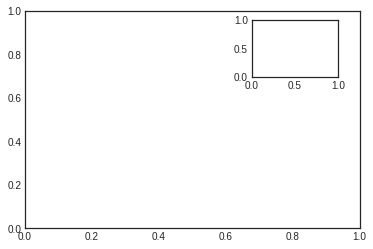

In [2]:
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.65, 0.65, 0.2, 0.2])

plt.axes 等同于 fig.add_axes()

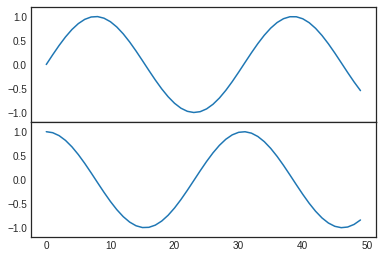

In [3]:
fig = plt.figure()
ax1 = fig.add_axes([0.1, 0.5, 0.8, 0.4],
                   xticklabels=[], ylim=(-1.2, 1.2))
ax2 = fig.add_axes([0.1, 0.1, 0.8, 0.4],
                   ylim=(-1.2, 1.2))

x = np.linspace(0, 10)
ax1.plot(np.sin(x))
ax2.plot(np.cos(x));

# 4 plt.ylim plt.xlim限制轴的刻度范围 

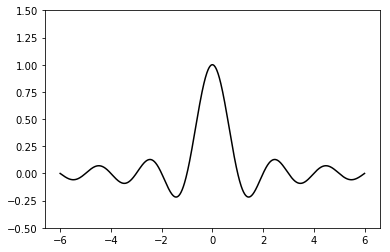

In [10]:
X = np.linspace(-6, 6, 1024)
plt.ylim(-.5, 1.5)
plt.plot(X, np.sinc(X), c = 'k')
plt.show()

# 5 控制图形的大小

plt.figure(figsize=(10.24, 2.56))

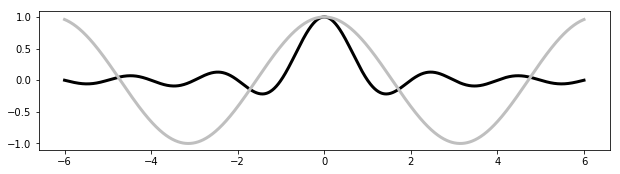

In [11]:
X = np.linspace(-6, 6, 1024)
Y1, Y2 = np.sinc(X), np.cos(X)
plt.figure(figsize=(10.24, 2.56))
plt.plot(X, Y1, c='k', lw = 3.)
plt.plot(X, Y2, c='.75', lw = 3.)
plt.show()